# <center>LAB 6 - Clustering

---------------------------

Name: **KRISH GOYAL** <br>
Reg No: **21112015** <br>
Class: **4 BSC DS** <br>

---------------
        
<u>**Objectives**</u>  
    
- Download the "Car Evaluation" Dataset from UCI Repository(https://archive.ics.uci.edu/ml/datasets/Car+Evaluation). Remove the target 'Class Values' from the dataset while applying clustering algorithms. 
- Find the optimal number of clusters using Elbow and Silhouette Method. 
- Compare KMeans and Agglomerative Clustering methods for clustering the instances in the above dataset.
- Validate the optimal number of clusters found out in the previous question.*Hint - Even if the algorithm does not require labels, for cross-checking of clustering values, you may use the labels.*
- Find what hyperparameters were suitable in KMeans (n_clusters, max_iter, init, algorithm)
- Find what hyperparameters were suitable in Agglomerative Clustering (n_clusters, metric, linkage)
- Plot Hierarchical Clustering (Dendrogram) [Source]
- Compare the better clustering algorithm with any classification algorithm, and write your notes on the same.
    
-------------------
    
<u> **Problem Statement**</u>  
- Implementing KMeans and Agglomerative Clustering methods
    
-----------------    

    
<u>**Methods**</u> 
- Decision Tree using **DecisionTreeClassifier()**
- **preprocessing.LabelEncoder()**
- **AgglomerativeClustering((n_clusters=k, affinity="euclidean", linkage="ward")**
- **KMeans(n_clusters = i,init='k-means++',n_init= 1, random_state= 0)**
- **shc.dendrogram(shc.linkage(df, method='complete'))**
    
------------------
    
<u>**Observations**</u>
- Importing the Dataset from the csv file
- General information about the data like no of rows and columns with their data types.
- Removing the Target variable and taking the dataset for further procedure
- Encoding the values present in the dataset to generalise the dataset   
- The optimum no of clusters appears to be k=8 as in both Elbow and Silhouette Methods with K++ as the method.
- The optimum no of clusters appears to be k=8 as in both Elbow and Silhouette Methods with random as the method.   
- Visualization of Silhouette Score showcasing the different clusters
- The optimum no of clusters appears to k=4 as in linkage='average' with Agglomerative Clustering
- The optimum no of clusters appears to k=3 as in linkage='complete' with Agglomerative Clustering
- The optimum no of clusters appears to be k=8 as in both Elbow and Silhouette Methods with random as the method.
- Showcasing the optimal clusters using Distortion Score Elbow for K-Means Clustering as k=8 with best line at 8
- Showcasing the optimal clusters using Silhouette Score Elbow for K-Means Clustering as k=2 with best line at 2
- Showcasing the optimal clusters using Calinski Harabasz Score Elbow for KMeans Clustering as k=2 with best line at 2
- The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). The highest change is at 8 thus , optimal number of clusters being 8.
- Implementation through GridSearchCV of applying different algorithms and estimating the best parameter and best score from the dataset. Therefore, 8 as the maximum clusters   
- Plotting of Heirarchical Clustering using different methods as 'ward'&'complete'. Hence Obtaining K=8 from the Dendrogram.
- This graph showcases distance map of the intercluster distance between the clusters display the embedding of the clusters in 2 dimenesions PC1 and PC2.    
- The Classification Accuracy of Cars is more than Silhouette Score of Cars. Moreover the Silhouette Score: 0.17
- Showcasing the Confusion Matrix to check the accuracy of the model.
- Obtaining the centriods from the K-Means using TensorFlow Library.
    
------------------
 
<u>**Results**</u>
- The optimal number of clusters k= 8 , after the comparison with different clustering algorithms of Elbow and Silhouette Method.
- The optimal number of clusters k= 8 using K-Means Clustering wheread k= 4 using Agglomerative Clustering

------------------
 
<u>**Learnings & Reflection**</u>
- Agglomerative Clustering is better than K-Means as the number of clusters in kmeans, can be chosen k affects the clustering in the first place. Here, in agglomerative clustering, clusters were merged together in a hierarchical manner. This merging can be either single, complete, or average linkage resulting in not just one but many different agglomerative algorithms.
- Moreover ,There is no one best alogorithm which is agglomerative clustering or k-means clustering is better, as both approaches have their own strengths and weaknesses, and the suitability of each method depends on the specific characteristics of the data and the particular datasets.

------------------

<u>**References**</u> <br> 
1. [Pandas Documendation](https://pandas.pydata.org/)<br>
2. [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)<br>
3. [Plot Hierarchical Clustering Dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)
4. [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
5. [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
    
***************
    
[Github Link](https://github.com/Krishnaa-tech/ML-Projects.git)<br>
------------------

<u><center>**Completion Status**</u>

| Question Number | Status |
|---|---|
| 1 | Completed |
| 2 | Completed |
| 3 | Completed |
| 4 | Completed |
| 5 | Completed |
| 6 | Completed |
| 7 | Completed |

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
new_df = pd.read_csv("C:/Users/goyal/Downloads/car.data")
new_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


**Observation** - *Importing the Dataset from the csv file*

In [3]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


**Observation** - *General information about the data like no of rows and columns with their data types*

In [4]:
new_df.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Quality']

In [5]:
y = new_df['Quality']

In [6]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y =  label_encoder.fit_transform(y)
y

array([2, 2, 2, ..., 2, 1, 3])

In [7]:
df = new_df.drop(['Quality'], axis=1)

In [8]:
df

,Buying,Maint,Doors,Persons,Lug_boot,Safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


**Observation** - *Removing the Target variable and taking the dataset for further procedure*

In [9]:
# Encoding the values of the columns
buying_mapper = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
maint_mapper = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
doors_mapper = {2: 2, 3: 3, 4: 4, '5more': 5}
persons_mapper = {2: 1, 4: 2, 'more': 3}
safety_mapper = {'high': 3, 'med': 2, 'low': 1}
lug_boot_mapper = {'big': 3, 'med': 2, 'small': 1}

In [10]:
df["Maint"] = df["Maint"].replace(maint_mapper)
df["Doors"] = df["Doors"].replace(doors_mapper)
df["Persons"] = df["Persons"].replace(persons_mapper)
df["Lug_boot"] = df["Lug_boot"].replace(lug_boot_mapper)
df["Safety"] = df["Safety"].replace(safety_mapper)
df['Buying'] = df['Buying'].replace(buying_mapper)

**Observation** - *Encoding the values present in the dataset to generalise the dataset*

In [11]:
df['Doors'] = df['Doors'].astype('int64')
df['Persons'] = df['Persons'].astype('int64')

In [12]:
df.dtypes

Buying      int64
Maint       int64
Doors       int64
Persons     int64
Lug_boot    int64
Safety      int64
dtype: object

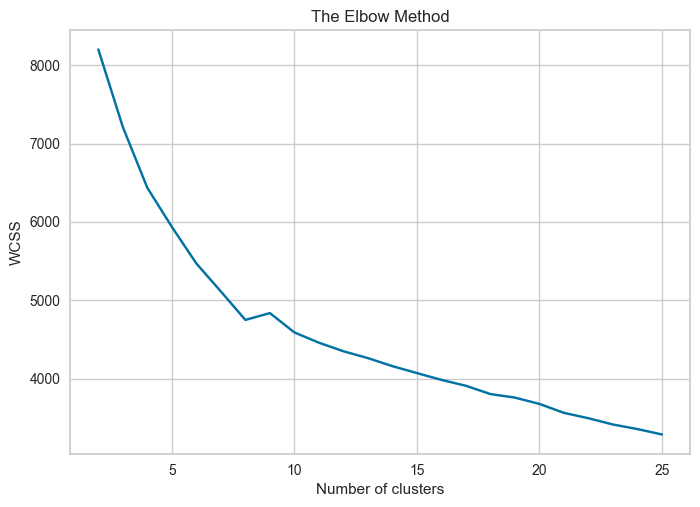

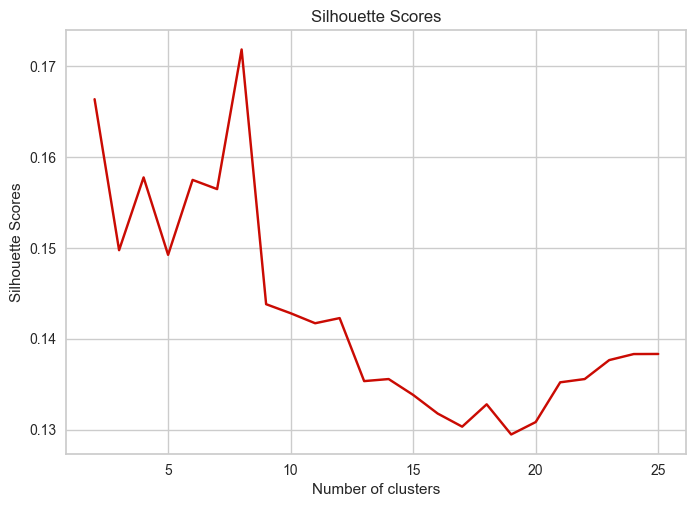

In [13]:
# Finding the optimum number of clusters for k-means classification
wcss = []
silhouette_scores = []

for i in range(2, 26):
    kmeans = KMeans(n_clusters = i,init='k-means++',n_init= 1, random_state= 42)
    cluster_labels = kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df,cluster_labels))

# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(2, 26), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

plt.plot(range(2, 26), silhouette_scores,'rx-')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores') # Within cluster sum of squares
plt.show()

#kmeans = KMeans(i=4 ,random_state=0)
#cluster_labels = kmeans.fit_predict(df)

**Observation** - *The optimum no of clusters appears to be **k=8** as in both Elbow and Silhouette Methods with K++ as the method.*

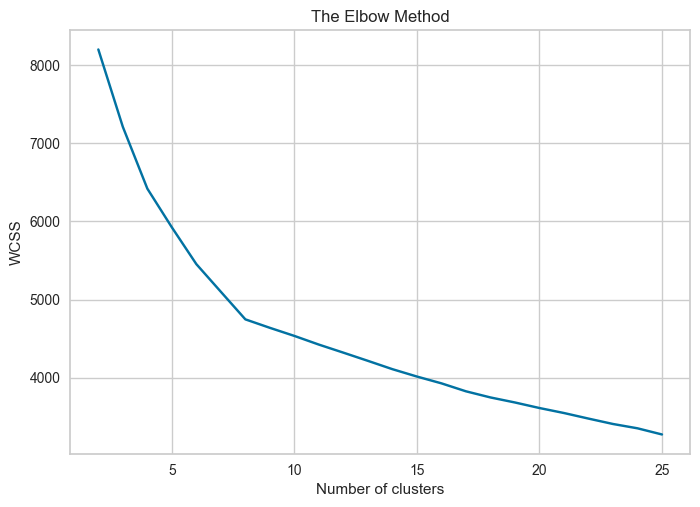

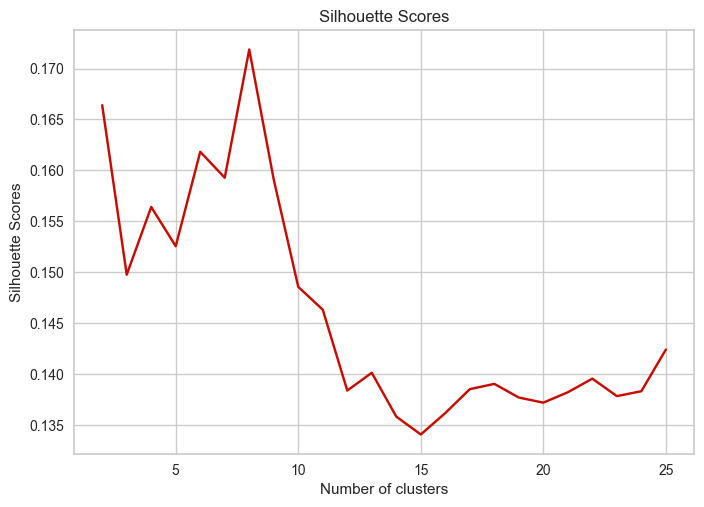

In [14]:
# Finding the optimum number of clusters for k-means classification
wcss = []
silhouette_scores = []

for i in range(2, 26):
    kmeans = KMeans(n_clusters = i, n_init= 10, random_state= 42)
    cluster_labels = kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df,cluster_labels))

# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(2, 26), wcss,"bx-")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

plt.plot(range(2, 26), silhouette_scores,"rx-")
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores') # Within cluster sum of squares
plt.show()

#kmeans = KMeans(i=4 ,random_state=0)
#cluster_labels = kmeans.fit_predict(df)

**Observation** - *The optimum no of clusters appears to be **k=8** as in both Elbow and Silhouette Methods with random as the method.*

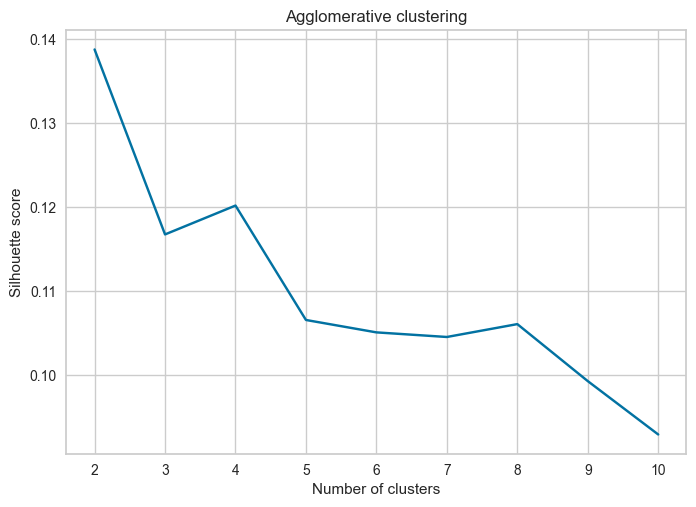

In [15]:
# Agglomerative clustering
agglo_scores = []

for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="ward")
    agglo.fit(df)
    agglo_scores.append(silhouette_score(df, agglo.labels_))

# Plot the elbow curve
plt.plot(range(2, 11), agglo_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Agglomerative clustering")
plt.show()

**Observation** - *The optimum no of clusters appears to **k=4** as in linkage='ward' with Agglomerative Clustering*

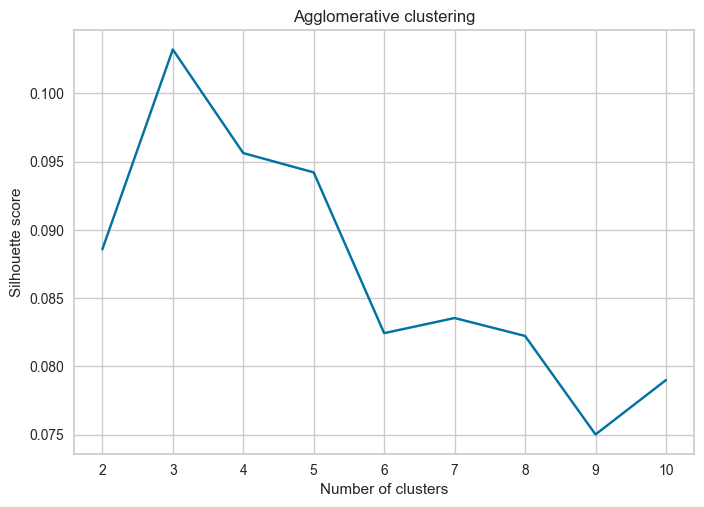

In [16]:
agglo_scores = []

for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="complete")
    agglo.fit(df)
    agglo_scores.append(silhouette_score(df, agglo.labels_))

# Plot the elbow curve
plt.plot(range(2, 11), agglo_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Agglomerative clustering")
plt.show()

**Observation** - *The optimum no of clusters appears to **k=3** as in linkage='complete' with Agglomerative Clustering*

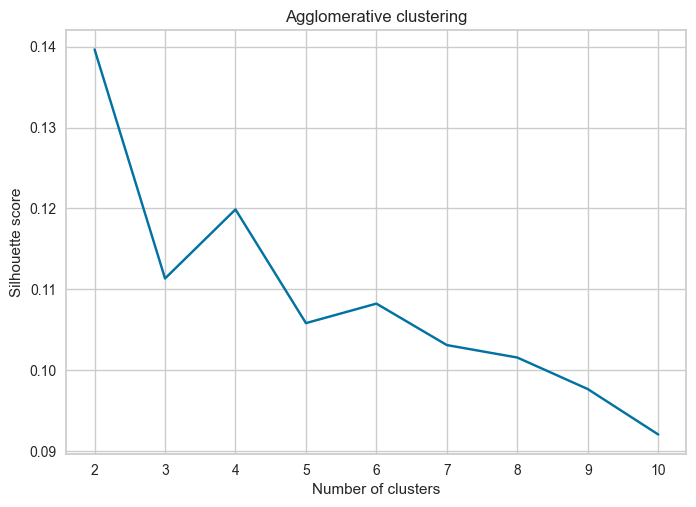

In [17]:
agglo_scores = []

for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="average")
    agglo.fit(df)
    agglo_scores.append(silhouette_score(df, agglo.labels_))

# Plot the elbow curve
plt.plot(range(2, 11), agglo_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Agglomerative clustering")
plt.show()

**Observation** - *The optimum no of clusters appears to **k=4** as in linkage='average' with Agglomerative Clustering*

In [18]:
# Fit K-Means
kmeans_1 = KMeans(n_clusters=4,random_state= 42)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(df)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(df, kmeans_1.labels_, metric='euclidean')

print('Silhouette Score: %.4f' % score_kemans_s)


Silhouette Score: 0.1564


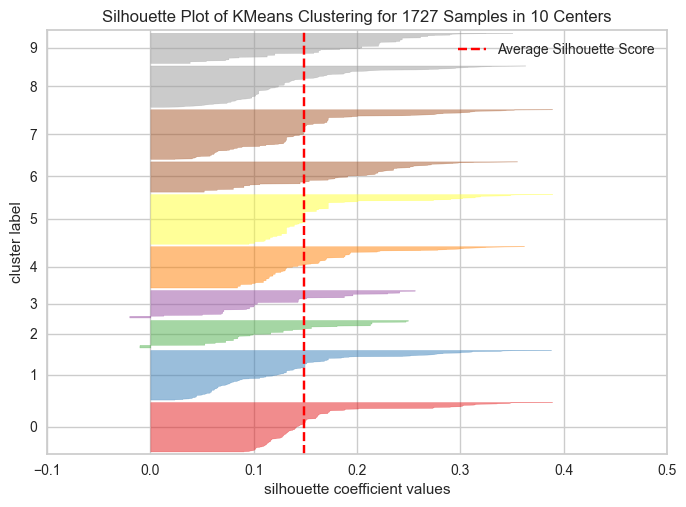

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 1727 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
model_4clust = KMeans(n_clusters = 10, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(df)    
sil_visualizer.show()

**Observation** - *Visualization of Silhouette Score showcasing the different clusters*

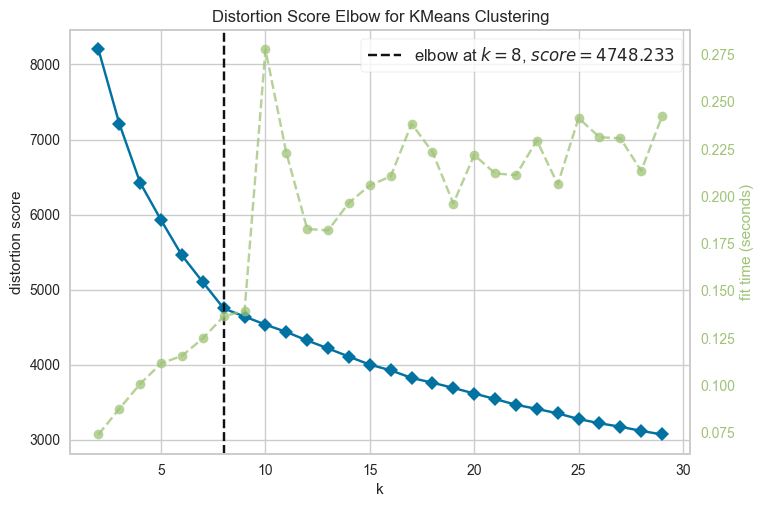

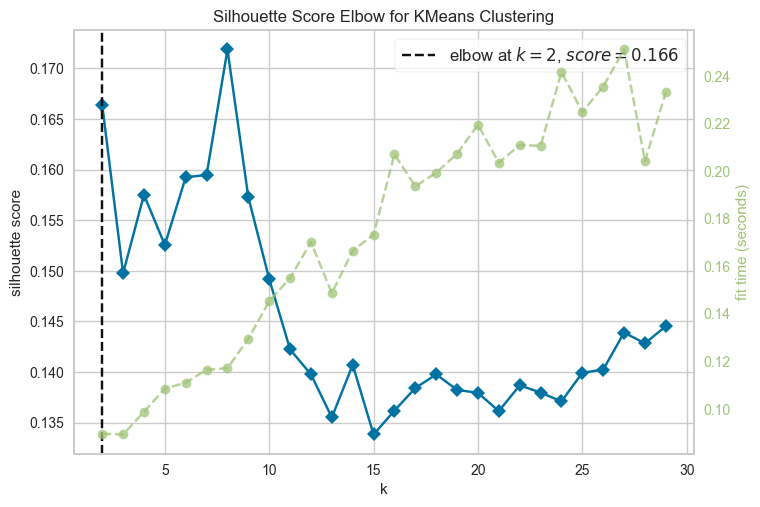

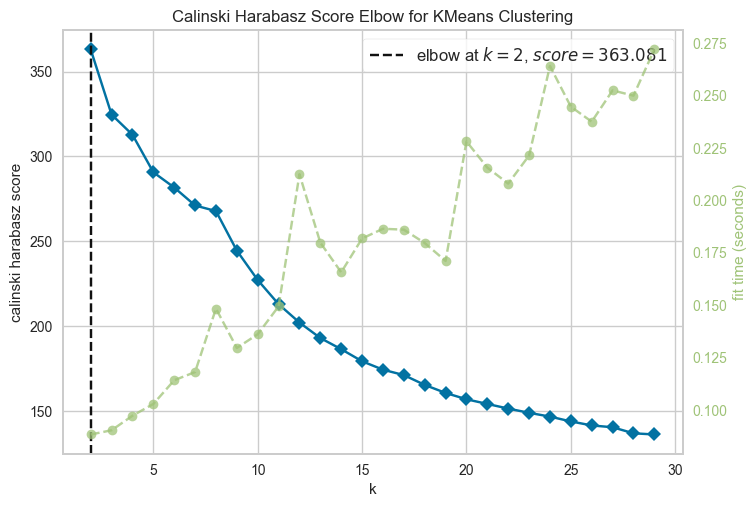

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [20]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='distortion',timings= True)
visualizer.fit(df)       # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(df)       # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz',timings= True)
visualizer.fit(df)       # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Observation** :- 
- *Showcasing the optimal clusters using Distortion Score Elbow for K-Means Clustering as **k=8** with best line at 8*
- *Showcasing the optimal clusters using Silhouette Score Elbow for K-Means Clustering as **k=2** with best line at 2*
- *Showcasing the optimal clusters using Calinski Harabasz Score Elbow for KMeans Clustering as **k=2** with best line at 2* 

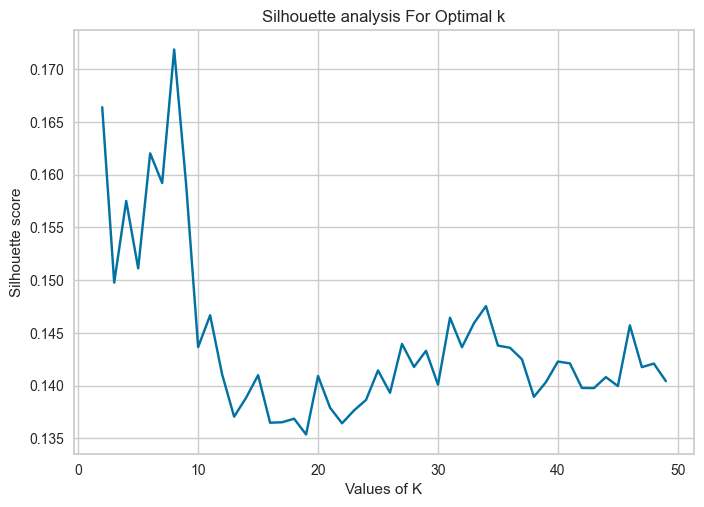

In [21]:
range_n_clusters = range(2,50)
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

**Observation** - *The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). The highest change is at 8 thus , optimal number of clusters being 8*

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_clusters": [3, 4, 5,8],
    "max_iter": [100, 200, 300],
    "init": ["k-means++", "random"],
    "algorithm": ["auto", "full", "elkan"]
}

kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=3)
grid_search.fit(df)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 8}
Best score: -2635.7855794743177


**Observation** - *Implementation through GridSearchCV of applying different algorithms and estimating the best parameter and best score from the dataset. Therefore, 8 as the maximum clusters*

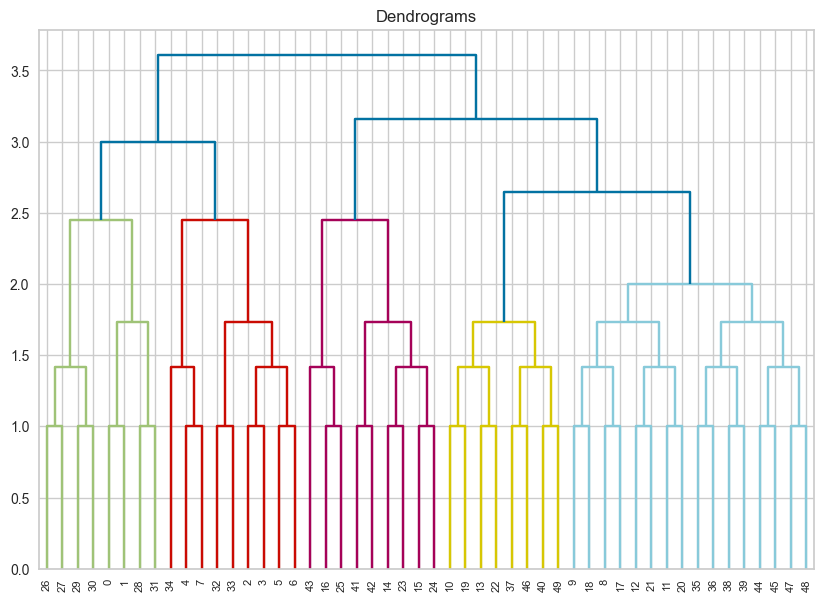

In [23]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df[:50], method='complete'))

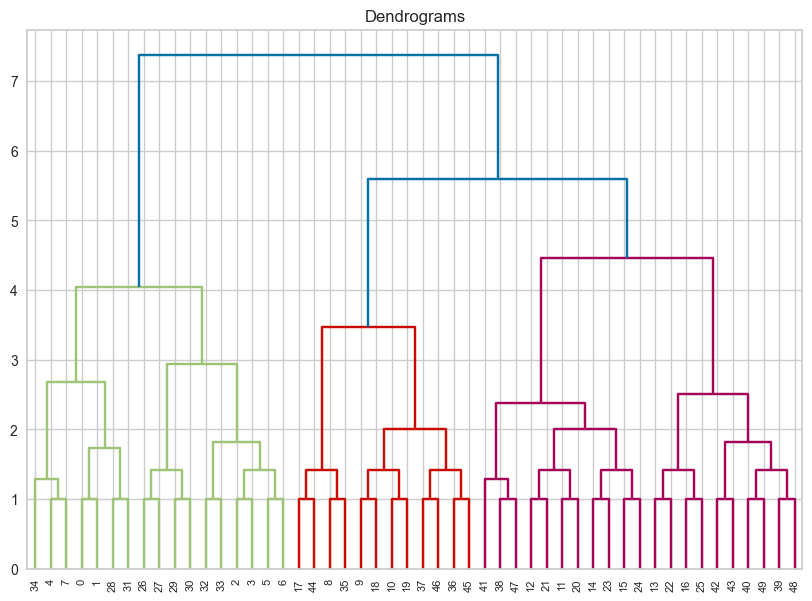

In [24]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df[:50], method='ward'))

**Observation** - *Plotting of Heirarchical Clustering using different methods as 'ward'&'complete'. Hence Obtaining **K=8** from the Dendrogram*

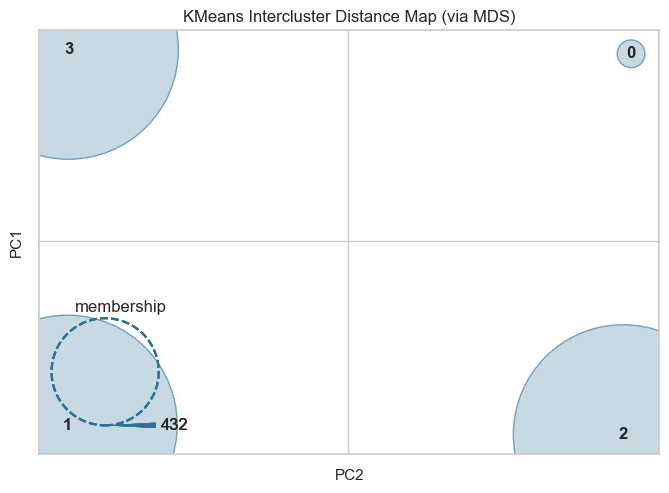

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [25]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Observation** - *This graph showcases distance map of the intercluster distance between the clusters display the embedding of the clusters in 2 dimenesions PC1 and PC2*

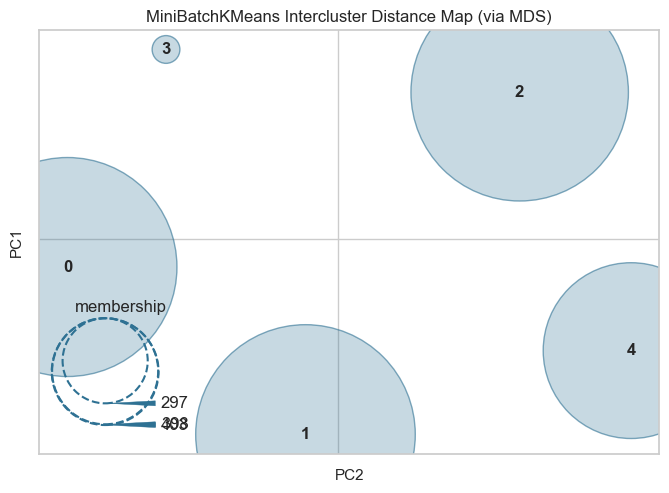

InterclusterDistance(ax=<AxesSubplot: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=5, random_state=777))

In [26]:
from yellowbrick.datasets import load_nfl
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import intercluster_distance


intercluster_distance(MiniBatchKMeans(5, random_state=777), df)

**Observation** - QUICK METHOD
- *This graph showcases distance map of the intercluster distance between the clusters display the embedding of the clusters in 2 dimenesions PC1 and PC2*

Silhouette Score: 0.17187343311706713


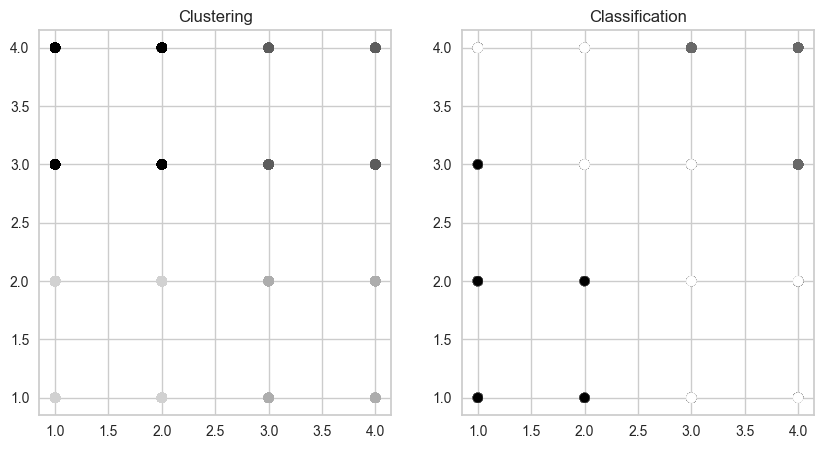

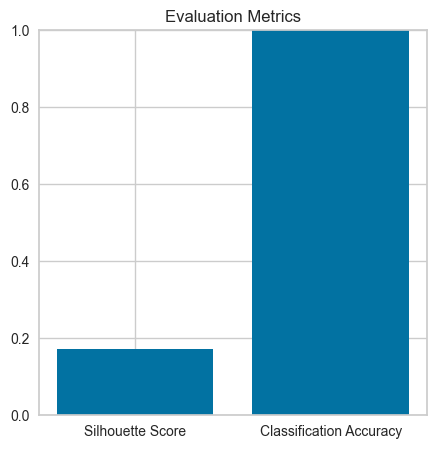

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Perform KMeans clustering with optimal hyperparameters
kmeans = KMeans(n_clusters=8, max_iter=150, init='k-means++', algorithm='auto',random_state=0, n_init=1)
clusterLabels = kmeans.fit_predict(df)

# Calculate the silhouette score for the clustering
silhouetteScore= silhouette_score(df, clusterLabels)
print("Silhouette Score:", silhouetteScore)

# Perform classification with Decision Tree
clf = DecisionTreeClassifier()
clf.fit(df, y)
y_pred = clf.predict(df)

# Calculate classification accuracy
accuracy = accuracy_score(y, y_pred)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusterLabels)
axs[0].set_title('Clustering')

axs[1].scatter(df.iloc[:, 0], df.iloc[:, 1], c=y)
axs[1].set_title('Classification')

# Plot evaluation metrics as a bar plot
fig, ax = plt.subplots(figsize=(5, 5))

metrics = ['Silhouette Score', 'Classification Accuracy']
scores = [silhouetteScore, accuracy]

ax.bar(metrics, scores)
ax.set_ylim([0, 1])
ax.set_title('Evaluation Metrics')

plt.show()

**Observation** - *The Classification Accuracy of Cars is more than Silhouette Score of Cars. Moreover the Silhouette Score: 0.17*

In [28]:
# create confusion matrix
cm = confusion_matrix(y, y_pred)

# print confusion matrix
print(cm)

[[ 384    0    0    0]
 [   0   69    0    0]
 [   0    0 1209    0]
 [   0    0    0   65]]


**Observation** - *Showcasing the Confusion Matrix to check the accuracy of the model.*

## EXTRA EXPLORATION

### Exploration done through web Articles and ChatGPT

In [29]:
import tensorflow as tf
import numpy as np

# Generate sample data
num_points = 2000
num_clusters = 4
points = tf.constant(np.random.uniform(0, 10, (num_points, 2)))

# Initialize centroids randomly
centroids = tf.Variable(tf.slice(tf.random.shuffle(points), [0, 0], [num_clusters, -1]))

# Expand dimensions for broadcasting
points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

# Compute distances between each point and centroid
distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

# Update centroids
means = []
for c in range(num_clusters):
    # Find points assigned to cluster c
    assigned_points = tf.boolean_mask(points, tf.equal(assignments, c))
    # Compute mean of assigned points
    mean = tf.reduce_mean(assigned_points, axis=0)
    means.append(mean)
centroids = tf.stack(means)

# Repeat until convergence
for i in range(10):
    distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
    assignments = tf.argmin(distances, 0)
    means = []
    for c in range(num_clusters):
        assigned_points = tf.boolean_mask(points, tf.equal(assignments, c))
        mean = tf.reduce_mean(assigned_points, axis=0)
        means.append(mean)
    centroids = tf.stack(means)

# Print final centroids
print(centroids)

tf.Tensor(
[[4.73783568 8.07300377]
 [8.66682637 4.16216603]
 [6.83632523 1.73180516]
 [2.62075502 3.12611701]], shape=(4, 2), dtype=float64)


**Observation** - *Obtaining the centriods from the K-Means using TensorFlow Library.*